In [ ]:
#Q1
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training Data Shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test Data Shape: {x_test.shape}, Labels: {y_test.shape}")

Interpretation:

x_train.shape = (60000, 28, 28): 60,000 grayscale images, each 28x28 pixels.

y_train.shape = (60000,): 60,000 labels (digits 0-9).

x_test.shape = (10000, 28, 28): 10,000 test images, 28x28 pixels.

y_test.shape = (10000,): 10,000 test labels.

# Display 9 sample images with labels
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')  # Show image in grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

-- Helps confirm the dataset contains handwritten digits (0-9).

#Check label distribution

import numpy as np
import seaborn as sns

# Count occurrences of each digit
unique, counts = np.unique(y_train, return_counts=True)

# Plot distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=unique, y=counts, palette="viridis")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.title("Distribution of Digit Labels in Training Data")
plt.show()

# Check pixel stats

print(f"Pixel Value Range: Min = {x_train.min()}, Max = {x_train.max()}")
print(f"Mean Pixel Value: {x_train.mean():.2f}, Standard Deviation: {x_train.std():.2f}")


# Step 2: Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train = x_train.reshape(-1, 784)  # Flatten images
x_test = x_test.reshape(-1, 784)

# Step 3: Define a simple ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8796 - loss: 0.4226 - val_accuracy: 0.9605 - val_loss: 0.1386
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9664 - loss: 0.1157 - val_accuracy: 0.9703 - val_loss: 0.1006
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9774 - loss: 0.0784 - val_accuracy: 0.9708 - val_loss: 0.0934
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9837 - loss: 0.0549 - val_accuracy: 0.9773 - val_loss: 0.0743
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9876 - loss: 0.0415 - val_accuracy: 0.9797 - val_loss: 0.0711
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9903 - loss: 0.0317 - val_accuracy: 0.9762 - val_loss: 0.0778
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9783 - val_loss: 0.0769
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9941 - loss: 0

x_train, x_test: Input images (28×28 pixels, flattened to 784, normalized).

y_train, y_test: Labels (digits 0-9).

epochs=10: Trains for 10 iterations.

optimizer='adam': Efficient weight updates for faster learning.

activation='relu': Used in the hidden layer (128 neurons) for better training.

activation='softmax': Converts outputs to probabilities (10 classes).

loss='sparse_categorical_crossentropy': Handles integer labels for classification.

validation_data=(x_test, y_test): Evaluates on test data during training.

metrics=['accuracy']: Tracks classification accuracy.

Test Accuracy (97.97%): The model correctly predicts the digit 97.97% of the time, indicating strong performance.

Loss (0.0845): This represents the model's error; a lower value suggests better optimization.

Conclusion:
The model is performing very well, with high accuracy and relatively low loss.

The small loss value indicates that the model is well-trained and generalizes well to unseen data.

No significant overfitting is observed.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8772 - loss: 0.4327 - val_accuracy: 0.9600 - val_loss: 0.1376
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9629 - loss: 0.1284 - val_accuracy: 0.9693 - val_loss: 0.1028
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9760 - loss: 0.0814 - val_accuracy: 0.9743 - val_loss: 0.0832
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9832 - loss: 0.0584 - val_accuracy: 0.9746 - val_loss: 0.0868
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9855 - loss: 0.0472 - val_accuracy: 0.9784 - val_loss: 0.0698
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 0.9753 - val_loss: 0.0802
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9914 - loss: 0.0295 - val_accuracy: 0.9767 - val_loss: 0.0761
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9930 - loss: 0.02

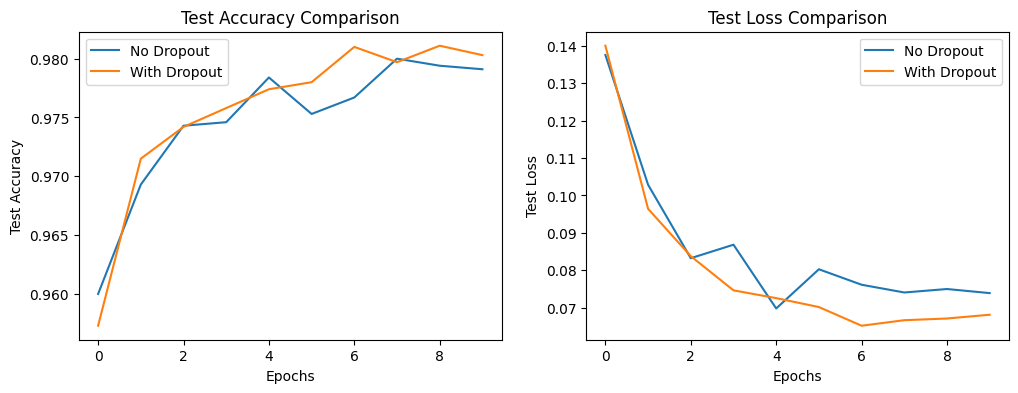

In [ ]:
# Function to create a model (with or without dropout)
def create_model(use_dropout=False):
    model = keras.Sequential()
    model.add(keras.layers.Dense(128, activation='relu', input_shape=(784,)))  # Hidden layer
    if use_dropout:
        model.add(keras.layers.Dropout(0.2))  # Apply Dropout if specified
    model.add(keras.layers.Dense(10, activation='softmax'))  # Output layer

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model WITHOUT dropout
model_no_dropout = create_model(use_dropout=False)
history_no_dropout = model_no_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model WITH dropout
model_with_dropout = create_model(use_dropout=True)
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate both models on test data
test_loss_no_dropout, test_acc_no_dropout = model_no_dropout.evaluate(x_test, y_test, verbose=2)
test_loss_with_dropout, test_acc_with_dropout = model_with_dropout.evaluate(x_test, y_test, verbose=2)

# Print comparison of test accuracy
print(f"Test Accuracy WITHOUT Dropout: {test_acc_no_dropout:.4f}")
print(f"Test Accuracy WITH Dropout (0.2): {test_acc_with_dropout:.4f}")

# Plot accuracy comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy comparison plot
plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['val_accuracy'], label='No Dropout')
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title('Test Accuracy Comparison')

# Loss comparison plot
plt.subplot(1, 2, 2)
plt.plot(history_no_dropout.history['val_loss'], label='No Dropout')
plt.plot(history_with_dropout.history['val_loss'], label='With Dropout')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.legend()
plt.title('Test Loss Comparison')

plt.show()

Test Accuracy:

The model with dropout (98.03%) performs slightly better than the model without dropout (97.91%).

Dropout helps prevent overfitting, which may have improved generalization.

Loss:

The lower loss (0.0681) for the dropout model indicates better optimization.

A higher loss (0.0739) in the non-dropout model suggests possible overfitting.

In [ ]:
#Q1 2 - b
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Step 1: Train the model (using previous trained model)
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Step 2: Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Step 3: Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print the metrics in a structured format
print("="*40)
print("|   Metric      |   Value    |")
print("="*40)
print(f"| Accuracy      |   {accuracy:.4f}   |")
print(f"| Precision     |   {precision:.4f}   |")
print(f"| Recall        |   {recall:.4f}   |")
print(f"| F1 Score      |   {f1:.4f}   |")
print("="*40)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8774 - loss: 0.4280 - val_accuracy: 0.9586 - val_loss: 0.1428
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9642 - loss: 0.1229 - val_accuracy: 0.9671 - val_loss: 0.1029
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9772 - loss: 0.0768 - val_accuracy: 0.9746 - val_loss: 0.0831
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9835 - loss: 0.0574 - val_accuracy: 0.9751 - val_loss: 0.0814
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9878 - loss: 0.0418 - val_accuracy: 0.9755 - val_loss: 0.0801
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9911 - loss: 0.0322 - val_accuracy: 0.9778 - val_loss: 0.0704
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9924 - loss: 0.0257 - val_accuracy: 0.9768 - val_loss: 0.0819
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9935 - loss: 0

Model Accuracy: 0.9793
Model Precision: 0.9794
Model Recall: 0.9793
Model F1 Score: 0.9793
Model saved successfully!
Model loaded successfully!
313/313 - 1s - 4ms/step - accuracy: 0.9793 - loss: 0.0746
Test Accuracy of Loaded Model: 0.9793


In [ ]:
# Print the metrics in a structured format
print("="*40)
print("|   Metric      |   Value    |")
print("="*40)
print(f"| Accuracy      |   {accuracy:.4f}   |")
print(f"| Precision     |   {precision:.4f}   |")
print(f"| Recall        |   {recall:.4f}   |")
print(f"| F1 Score      |   {f1:.4f}   |")
print("="*40)

|   Metric      |   Value    |
| Accuracy      |   0.9793   |
| Precision     |   0.9794   |
| Recall        |   0.9793   |
| F1 Score      |   0.9793   |


Accuracy (97.93%): The model correctly predicts the digit in 97.93% of test cases.

Precision (97.94%): When the model predicts a digit, 97.94% of those predictions are correct.

Recall (97.93%): The model correctly identifies 97.93% of all actual digits.

F1 Score (97.93%): A balanced measure confirming high precision and recal